# Nivel Educativo de la Madre como Determinante Clave del Acceso a Controles Prenatales en Perú
**Curso:** Introducción a Machine Learning con Python

**Grupo 5:**

Fabricio Calle Cardoza

Bianca Jimenez Vargas

Aracely Lalupu Lalupu

José Alonso Naira Carmen


---


# 1. Introducción y Marco teórico
### Un Enfoque en el Acceso al Control Prenatal en el Perú (2018-2023)

La atención prenatal es una intervención fundamental para reducir la mortalidad maternal y neonatal, nos ayuda a mantener y cuidar la vida de dos personas a la vez y que les pemita llevar tanto un embarazo como un parto saludable.
En el Perú, las políticas de salud pública, lideradas por el Ministerio de Salud (MINSA), promueven activamente el acceso a estos servicios. Un estándar de atención adecuada, tal como lo establece la Norma Técnica de Salud para la Atención Integral de Salud Materna, incluye un mínimo de seis atenciones durante la gestación. En estas atenciones se preveen problemas fisíologícos y emocionales, su objetivo es prevenir y detectar enfermedades como la anemia, el VIH o la hipertensión, y ofrecer un soporte emocional y educativo integral para la gestante y su familia, abordando aspectos de autocuidado y preparación para la lactancia.

Si bien la **Encuesta Demográfica y de Salud Familiar (ENDES)** de 2021 reportó una alta cobertura general, con el 98.3% de las mujeres gestantes habiendo recibido atención profesional calificada , no podemos olvidar que nuestro país se encuentra ligado a desigualdades territoriales y estructurales en muchos aspectos. Las mujeres en zonas rurales de la sierra y la selva, así como aquellas en áreas de pobreza, enfrentan mayores complicaciones para acceder a estos servicios. Este contexto justifica la necesidad de una investigación más profunda que vaya más allá de las cifras de cobertura global y examine los factores subyacentes que influyen en la calidad y frecuencia de la atención recibida por parte de estas futuras madres. Para comprender y explicar esta diferenciación en el Perú, hemos establecido nuestra pregunta de investigación: **¿Cómo se relaciona el nivel educativo de la madre con el acceso a controles prenatales adecuados en el Perú?**

Nuestra hipótesis es que existe una relación positiva y significativa: **a mayor nivel educativo de la madre, mayor será la probabilidad de tener un control prenatal adecuado** (definido como 6 o más visitas).




##Fuente de Datos
Para este análisis, nos basamos en la **Encuesta Demográfica y de Salud Familiar (ENDES)**, una fuente oficial y robusta de datos que nos permite estudiar la salud de las familias peruanas. Nuestro objetivo es explorar la relación entre el control prenatal y variables clave como el **nivel educativo de la madre**, el **quintil de riqueza del hogar**, la **Ubicación geográfica (urbano/rural)** y la **edad de la madre**, teniendo en cuenta un rango de edad entre los 15 a 49 años

##Variables Clave

1. Control Prenatal Adecuado: Variable dependiente.

2. Nivel Educativo de la Madre: La educación aumenta la capacidad de comprender la importancia del cuidado preventivo y facilita el acceso a la información.

3. Quintil de Riqueza: El ingreso familiar condiciona la demanda efectiva de servicios de salud.

4. Ubicación geográfica (urbano/rural): En áreas rurales, las barreras de infraestructura y disponibilidad de servicios limitan el acceso.

5. Edad de la Madre: Variable de control. La edad puede influir en la búsqueda de atención médica, siendo un factor que mejora la robustez del análisis.




La teoría económica y social sugiere que el acceso a servicios de salud está fuertemente correlacionado con el nivel educativo y la riqueza. Se espera que las madres con mayor educación y en hogares de mayores ingresos tengan un acceso más completo al control prenatal. Del mismo modo, las diferencias geográficas podrían revelar disparidades en la infraestructura de salud. Este notebook busca validar y cuantificar estas hipótesis con los datos de ENDES, contando una historia coherente a través de gráficos y su interpretación.


#Preparación y Limpieza de Datos

En este bloque, importaremos las librerías necesarias y cargaremos los datos. Luego, aplicaremos los filtros y transformaciones para preparar el dataset para el análisis. Como se mencionó, nos centraremos en los registros de mujeres de 15 a 49 años con nacimientos en los últimos cinco años.

**Subimos la carpeta en donde se encuentra la data:**

DATA_ENDES_REC91

Y de Google Drive la movemos a Colab

In [ ]:
# Esta es la ruta por defecto que usa Google Colab para montar Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**REVISAMOS NOMBRES DE BASES DE DATOS QUE VAMOS A UTILIZAR**

Para esto usamos código y vemos que todas las bases estén de un periodo de 2018 - 2023

In [ ]:
import os

# ruta a la carpeta en Drive
path91 = "/content/drive/MyDrive/DATA_ENDES_REC91/"
path94 = "/content/drive/MyDrive/DATA_ENDES_REC94/"
path0111 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"
path41 = "/content/drive/MyDrive/DATA_ENDES_REC41/"

# listar los archivos que haya dentro de mi Drive
print(os.listdir(path91))
print(os.listdir(path94))
print(os.listdir(path0111))
print(os.listdir(path41))

['REC91_2018.SAV', 'REC91_2019.sav', 'REC91_2020.sav', 'REC91_2021.SAV', 'REC91_2022.sav', 'REC91_2023.sav', 'REC91_2024.sav']
['REC94_2018.SAV', 'REC94_2019.SAV', 'REC94_2020.sav', 'REC94_2021.SAV', 'REC94_2022.sav', 'REC94_2023.sav']
['REC0111_2018.SAV', 'REC0111_2019.sav', 'REC0111_2020.sav', 'REC0111_2021.SAV', 'REC0111_2022.sav', 'REC0111_2023.sav']
['REC41_2018.sav', 'REC41_2019.sav', 'REC41_2020.sav', 'REC41_2021.sav', 'REC41_2022.sav', 'REC41_2023.sav']


In [ ]:
# si pyreadstat todavía no está instalado, solo ejecuta este código
!pip install pyreadstat

**REVISAMOS CARACTERÍSTICAS DE ALGUNAS DE LAS BASES DE DATOS**

Esto con el fin de ver si se han subido correctamente y que la información esté disponible

In [ ]:
import pyreadstat

# ejemplo: leer un archivo REC94
df, meta = pyreadstat.read_sav("/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav")

# ver las primeras 20 filas (similar a list in 1/20 en Stata)
print(df.head(20))

# ver estructura del dataset (número de obs, variables, tipos de datos)
print(df.info())

# ver un resumen estadístico de todas las variables numéricas
print(df.describe())


       ID1              CASEID  MIDX   M1  M1A  M1B  M1C  M1D  M1E  M2A  ...  \
0   2020.0        000102401  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
1   2020.0        000117001  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
2   2020.0        000119801  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
3   2020.0        000123601  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
4   2020.0        000123901  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
5   2020.0        000206801  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  1.0  ...   
6   2020.0        000208401  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
7   2020.0        000303001  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  1.0  ...   
8   2020.0        000303001  2   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9   2020.0        000312401  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  0.0  ...   
10  2020.0        000322101  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  0.0  ...   
11  2020.0        000323501  2   1.0  2.

**CONTROLES PRENATALES**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC41/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "M14" in meta.column_names:
            print(f"✅ La variable 'M14' SÍ está en {file}")
        else:
            print(f"❌ La variable 'M14' NO está en {file}")

✅ La variable 'M14' SÍ está en REC41_2018.sav
✅ La variable 'M14' SÍ está en REC41_2019.sav
✅ La variable 'M14' SÍ está en REC41_2020.sav
✅ La variable 'M14' SÍ está en REC41_2021.sav
✅ La variable 'M14' SÍ está en REC41_2022.sav
✅ La variable 'M14' SÍ está en REC41_2023.sav


**NIVEL EDUCATIVO DE LA MADRE**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC91/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "S108N" in meta.column_names:
            print(f"✅ La variable 'S108N' SÍ está en {file}")
        else:
            print(f"❌ La variable 'S108N' NO está en {file}")

✅ La variable 'S108N' SÍ está en REC91_2018.SAV
✅ La variable 'S108N' SÍ está en REC91_2019.sav
✅ La variable 'S108N' SÍ está en REC91_2020.sav
✅ La variable 'S108N' SÍ está en REC91_2021.SAV
✅ La variable 'S108N' SÍ está en REC91_2022.sav
✅ La variable 'S108N' SÍ está en REC91_2023.sav
✅ La variable 'S108N' SÍ está en REC91_2024.sav


**REGION EN LA QUE VIVE**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC91/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "SREGION" in meta.column_names:
            print(f"✅ La variable 'SREGION' SÍ está en {file}")
        else:
            print(f"❌ La variable 'SREGION' NO está en {file}")

✅ La variable 'SREGION' SÍ está en REC91_2018.SAV
✅ La variable 'SREGION' SÍ está en REC91_2019.sav
✅ La variable 'SREGION' SÍ está en REC91_2020.sav
✅ La variable 'SREGION' SÍ está en REC91_2021.SAV
✅ La variable 'SREGION' SÍ está en REC91_2022.sav
✅ La variable 'SREGION' SÍ está en REC91_2023.sav
✅ La variable 'SREGION' SÍ está en REC91_2024.sav


**EDAD DE LA MADRE**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "V012" in meta.column_names:
            print(f"✅ La variable 'V012' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V012' NO está en {file}")

✅ La variable 'V012' SÍ está en REC0111_2018.SAV
✅ La variable 'V012' SÍ está en REC0111_2019.sav
✅ La variable 'V012' SÍ está en REC0111_2020.sav
✅ La variable 'V012' SÍ está en REC0111_2021.SAV
✅ La variable 'V012' SÍ está en REC0111_2022.sav
✅ La variable 'V012' SÍ está en REC0111_2023.sav


**QUINTIL DE RIQUEZA**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "V190" in meta.column_names:
            print(f"✅ La variable 'V190' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V190' NO está en {file}")

✅ La variable 'V190' SÍ está en REC0111_2018.SAV
✅ La variable 'V190' SÍ está en REC0111_2019.sav
✅ La variable 'V190' SÍ está en REC0111_2020.sav
✅ La variable 'V190' SÍ está en REC0111_2021.SAV
✅ La variable 'V190' SÍ está en REC0111_2022.sav
✅ La variable 'V190' SÍ está en REC0111_2023.sav


**URBANO/RURAL**

In [ ]:
import os
import pyreadstat

# Carpeta REC94
path94 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path94):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path94, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "V102" in meta.column_names:
            print(f"✅ La variable 'V102' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V102' NO está en {file}")

✅ La variable 'V102' SÍ está en REC0111_2018.SAV
✅ La variable 'V102' SÍ está en REC0111_2019.sav
✅ La variable 'V102' SÍ está en REC0111_2020.sav
✅ La variable 'V102' SÍ está en REC0111_2021.SAV
✅ La variable 'V102' SÍ está en REC0111_2022.sav
✅ La variable 'V102' SÍ está en REC0111_2023.sav


# 4. Análisis Exploratorio y Visualizaciones

Con los datos limpios y consolidados, procederemos a crear visualizaciones que nos permitan responder a nuestra pregunta de investigación y explorar la relación con otras variables.


### 4.1. Análisis Central: Nivel Educativo y Controles Prenatales

El siguiente segmento de gráficos de barras muestra la proporción de mujeres con controles prenatales adecuados (6 o más visitas) según su nivel educativo para cada año estudiado.


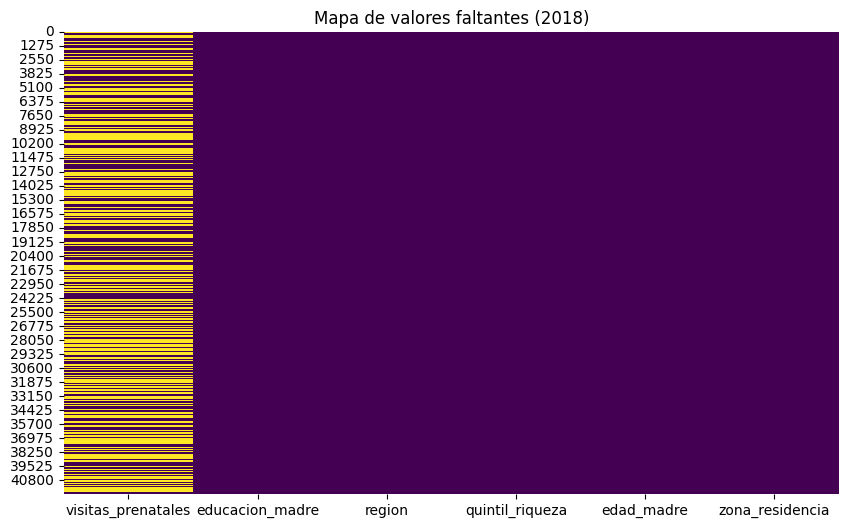

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2018
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2018["year"] = 2018

# Variable dependiente: prenatal adecuado
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2018["educacion"] = df_2018["S108N"].map(map_edu)

# Dummy urbano/rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2018.groupby("educacion")["prenatal_adecuado"].mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Renombrar variables a nombres más descriptivos
df_2018 = df_2018.rename(columns={
    "M14": "visitas_prenatales",
    "S108N": "educacion_madre",
    "SREGION": "region",
    "V190": "quintil_riqueza",
    "V012": "edad_madre",
    "V102": "zona_residencia"
})

# Seleccionamos solo las variables relevantes (ya con nombres renombrados)
vars_needed = ["visitas_prenatales", "educacion_madre", "region", "quintil_riqueza", "edad_madre", "zona_residencia"]
df_check = df_2018[vars_needed]

# Graficar heatmap de missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_check.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes (2018)")
plt.show()

educacion
Posgrado                 0.978448
Primaria                 0.844615
Secundaria               0.882123
Sin instrucción          0.840000
Sup. no universitaria    0.929668
Sup. universitaria       0.927664
Name: prenatal_adecuado, dtype: float64


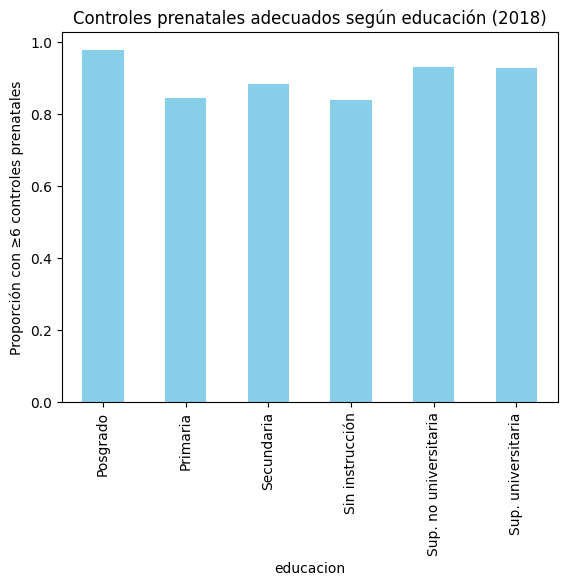

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2018
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2018["year"] = 2018

# Filtrar mujeres con dato en M14
df_2018 = df_2018[df_2018["M14"].notna()]

# Variable dependiente: prenatal adecuado
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2018["educacion"] = df_2018["S108N"].map(map_edu)

# Dummy urbano/rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2018.groupby("educacion")["prenatal_adecuado"].mean()

print(tabla)

# Gráfico
tabla.plot(kind="bar", color="skyblue")
plt.ylabel("Proporción con ≥6 controles prenatales")
plt.title("Controles prenatales adecuados según educación (2018)")
plt.show()


**Interpretación:** El gráfico muestra una clara relación entre el nivel educativo alcanzado en proporción con la asistencia de sus controles prenatales, eso nos da a entender que medida que aumenta el nivel de educación, también lo hace la barra de proporción, lo que indica un mayor acceso a la atención prenatal para el año 2018, y esta tendencia se mantiene para los siguientes años.

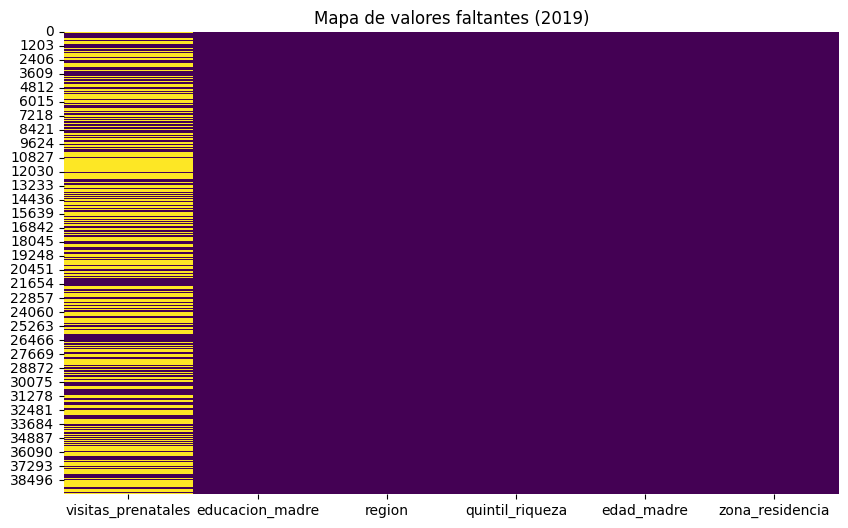

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2018
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2019["year"] = 2019

# Filtrar mujeres con dato en M14


# Variable dependiente: prenatal adecuado
df_2019["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2019["educacion"] = df_2019["S108N"].map(map_edu)

# Dummy urbano/rural
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2019.groupby("educacion")["prenatal_adecuado"].mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Renombrar variables a nombres más descriptivos
df_2019 = df_2019.rename(columns={
    "M14": "visitas_prenatales",
    "S108N": "educacion_madre",
    "SREGION": "region",
    "V190": "quintil_riqueza",
    "V012": "edad_madre",
    "V102": "zona_residencia"
})

# Seleccionamos solo las variables relevantes (ya con nombres renombrados)
vars_needed = ["visitas_prenatales", "educacion_madre", "region", "quintil_riqueza", "edad_madre", "zona_residencia"]
df_check = df_2019[vars_needed]

# Graficar heatmap de missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_check.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes (2019)")
plt.show()


educacion
Posgrado                 0.904762
Primaria                 0.883615
Secundaria               0.892744
Sin instrucción          0.859504
Sup. no universitaria    0.894231
Sup. universitaria       0.887669
Name: prenatal_adecuado, dtype: float64


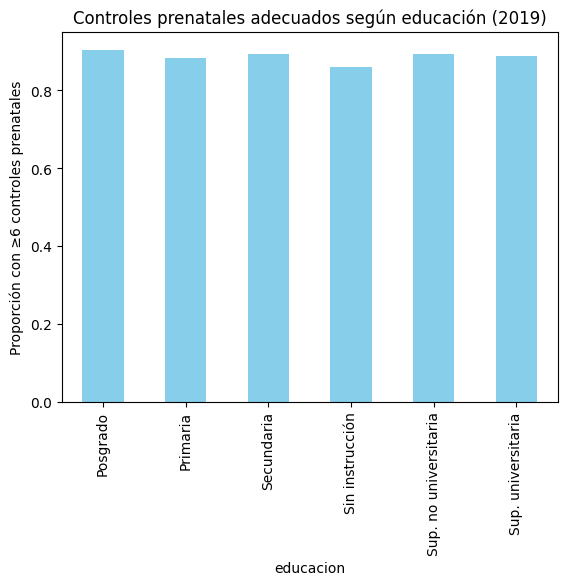

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2018
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2019["year"] = 2019

# Filtrar mujeres con dato en M14
df_2019 = df_2019[df_2019["M14"].notna()]

# Variable dependiente: prenatal adecuado
df_2019["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2019["educacion"] = df_2019["S108N"].map(map_edu)

# Dummy urbano/rural
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2019.groupby("educacion")["prenatal_adecuado"].mean()

print(tabla)

# Gráfico
tabla.plot(kind="bar", color="skyblue")
plt.ylabel("Proporción con ≥6 controles prenatales")
plt.title("Controles prenatales adecuados según educación (2019)")
plt.show()

### 4.2. Quintil de Riqueza y Región

Finalmente, exploramos cómo el quintil de riqueza y la región natural influyen en el acceso a los controles prenatales.


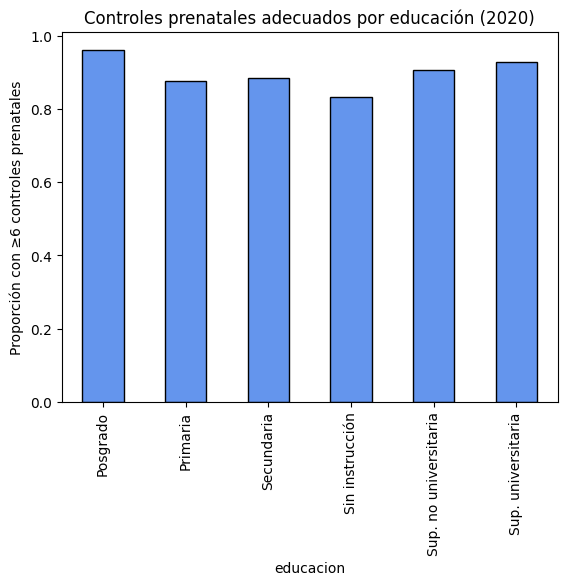

In [ ]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2020
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2020.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2020.sav"

# Leer solo las columnas necesarias
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2020 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2020["year"] = 2020

# Filtrar mujeres con dato en M14
df_2020 = df_2020[df_2020["M14"].notna()]

# Variable dependiente: prenatal adecuado
df_2020["prenatal_adecuado"] = (df_2020["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2020["educacion"] = df_2020["S108N"].map(map_edu)

# Dummy urbano/rural
df_2020["urbano"] = df_2020["V102"].apply(lambda x: 1 if x == 1 else 0)

# =====================================================
# 🔹 1. Barras: proporción de controles adecuados por educación
tabla_edu = df_2020.groupby("educacion")["prenatal_adecuado"].mean()
tabla_edu.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.ylabel("Proporción con ≥6 controles prenatales")
plt.title("Controles prenatales adecuados por educación (2020)")
plt.show()



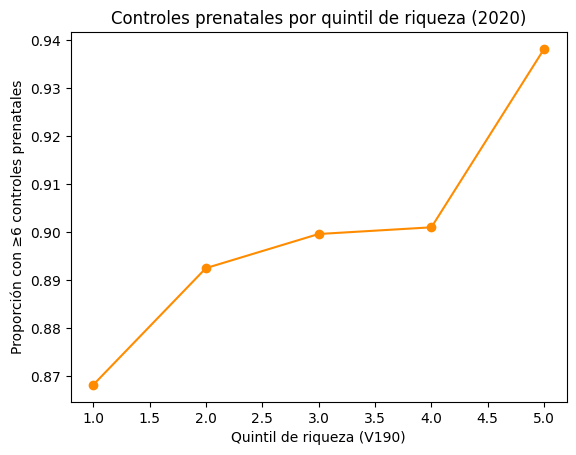

In [ ]:
# 🔹 2. Línea: proporción por quintil de riqueza
tabla_quintil = df_2020.groupby("V190")["prenatal_adecuado"].mean()
tabla_quintil.plot(kind="line", marker="o", color="darkorange")
plt.xlabel("Quintil de riqueza (V190)")
plt.ylabel("Proporción con ≥6 controles prenatales")
plt.title("Controles prenatales por quintil de riqueza (2020)")
plt.show()

**Interpretación:** El gráfico lineal nos indica que la relación que existe entre la riqueza y la proporción de controles prenatales. En este queda evidencia de que familias con altos recursos tienen un mejor control prenatal. Esto se puede originar debido a que cuentan con los recursos económicos necesarios para poder asistir a sus controles, o contratar doctores particulares que puedan asistirlas durante el proceso de embarazo.
Mientras que las familias de bajos recursos se pueden ver perjudicadas por su precario acceso a la salud.

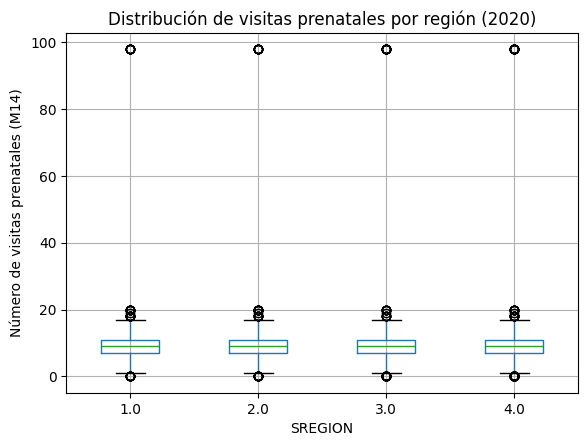

In [ ]:
# 🔹 3. Boxplot: distribución del número de visitas prenatales por región
df_2020.boxplot(column="M14", by="SREGION")
plt.suptitle("")
plt.title("Distribución de visitas prenatales por región (2020)")
plt.ylabel("Número de visitas prenatales (M14)")
plt.show()

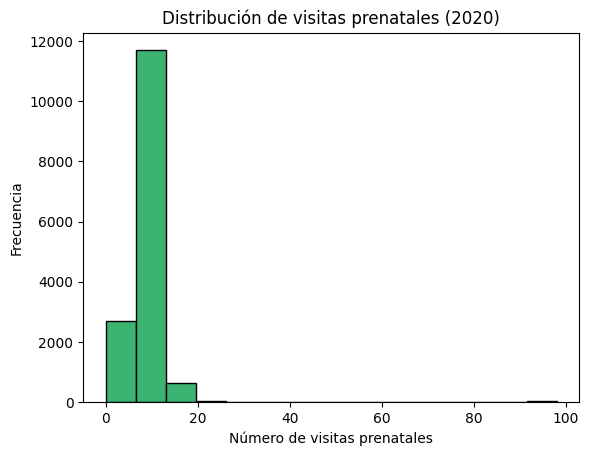

In [ ]:

# 🔹 4. Histograma: distribución general de visitas prenatales
df_2020["M14"].plot(kind="hist", bins=15, color="mediumseagreen", edgecolor="black")
plt.xlabel("Número de visitas prenatales")
plt.ylabel("Frecuencia")
plt.title("Distribución de visitas prenatales (2020)")
plt.show()
# =====================================================


In [ ]:
# ===== 2018 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# ================== REC91 ==================
# Leemos el módulo REC91 (cuestionario individual de la mujer).
# Solo cargamos 3 variables específicas:
#  - CASEID  : identificador único de la entrevistada (clave para unir bases).
#  - S108N   : nivel educativo alcanzado.
#  - SREGION : región natural (costa, sierra, selva).
rec91, _ = pyreadstat.read_sav(
    rec91_path,
    usecols=["CASEID", "S108N", "SREGION"]
)

# ================== REC41 ==================
# Leemos el módulo REC41 (salud materna, controles prenatales).
# Solo cargamos:
#  - CASEID : identificador único (para merge).
#  - M14    : número de visitas prenatales de la madre.
rec41, _ = pyreadstat.read_sav(
    rec41_path,
    usecols=["CASEID", "M14"]
)

# ================== REC0111 ==================
# Leemos el módulo REC0111 (información del hogar).
# Cargamos variables sociodemográficas relevantes:
#  - CASEID : identificador único.
#  - V012   : edad de la entrevistada (en años).
#  - V190   : quintil de riqueza (1 = más pobre, 5 = más rico).
#  - V102   : tipo de residencia (1 = urbano, 2 = rural).
# Cargar solo las columnas necesarias de REC0111
rec0111, _ = pyreadstat.read_sav(
    rec0111_path,
    usecols=["CASEID", "V012", "V190", "V102"]
)

# Unir REC91, REC41 y REC0111 por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Añadir columna con el año
df_2018["year"] = 2018

# Filtrar casos con dato en M14 (visitas prenatales)
df_2018 = df_2018[df_2018["M14"].notna()]

# Crear variable: 1 si tuvo ≥6 controles, 0 si menos
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Traducir códigos de nivel educativo
df_2018["educacion"] = df_2018["S108N"].map({
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
})

# Dummy urbano/rural: 1 urbano, 0 rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2019 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2019["year"] = 2019
df_2019 = df_2019[df_2019["M14"].notna()]
df_2019["prenatal_adecuado"] = (df_2019["M14"] >= 6).astype(int)
df_2019["educacion"] = df_2019["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2020 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2020.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2020.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2020 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2020["year"] = 2020
df_2020 = df_2020[df_2020["M14"].notna()]
df_2020["prenatal_adecuado"] = (df_2020["M14"] >= 6).astype(int)
df_2020["educacion"] = df_2020["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2020["urbano"] = df_2020["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2021 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2021.SAV"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2021.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2021.SAV"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2021 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2021["year"] = 2021
df_2021 = df_2021[df_2021["M14"].notna()]
df_2021["prenatal_adecuado"] = (df_2021["M14"] >= 6).astype(int)
df_2021["educacion"] = df_2021["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2021["urbano"] = df_2021["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2022 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2022.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2022.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2022.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2022 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2022["year"] = 2022
df_2022 = df_2022[df_2022["M14"].notna()]
df_2022["prenatal_adecuado"] = (df_2022["M14"] >= 6).astype(int)
df_2022["educacion"] = df_2022["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2022["urbano"] = df_2022["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2023 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2023.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2023.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2023.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2023 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2023["year"] = 2023
df_2023 = df_2023[df_2023["M14"].notna()]
df_2023["prenatal_adecuado"] = (df_2023["M14"] >= 6).astype(int)
df_2023["educacion"] = df_2023["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2023["urbano"] = df_2023["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== Unir todo =====
final_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

print("Observaciones totales:", final_df.shape[0])
print(final_df.groupby("year")["prenatal_adecuado"].mean())


Observaciones totales: 109862
year
2018    0.890285
2019    0.900223
2020    0.892673
2021    0.856994
2022    0.865337
2023    0.879848
Name: prenatal_adecuado, dtype: float64


### 4.3. Evolución a lo largo del tiempo

Esta sección explora cómo el promedio y la distribución de las visitas prenatales han evolucionado anualmente desde 2018.

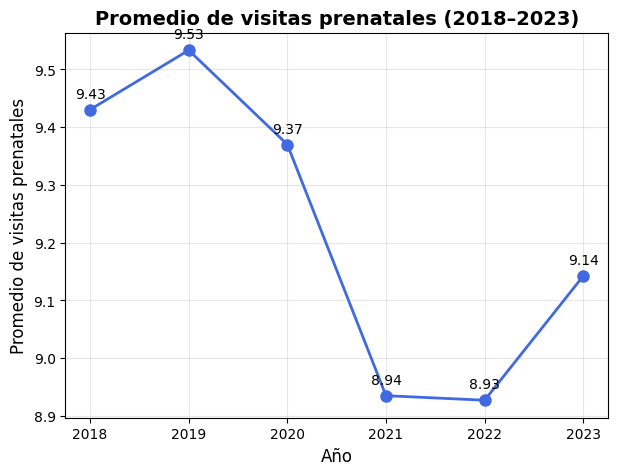

In [ ]:
import matplotlib.pyplot as plt

# Promedio de visitas prenatales por año
tabla_promedio = final_df.groupby("year")["M14"].mean()

plt.figure(figsize=(7,5))
plt.plot(tabla_promedio.index, tabla_promedio.values, marker="o",
         linestyle="-", color="royalblue", linewidth=2, markersize=8)

# Títulos y etiquetas
plt.title("Promedio de visitas prenatales (2018–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio de visitas prenatales", fontsize=12)

# Etiquetas en los puntos
for x, y in zip(tabla_promedio.index, tabla_promedio.values):
    plt.text(x, y+0.02, f"{y:.2f}", ha="center", fontsize=10, color="black")

# Ajustes del eje X
plt.xticks([2018, 2019, 2020, 2021, 2022, 2023])

plt.grid(alpha=0.3)
plt.show()


**Interpretación:** Hubo un descenso en el promedio de
 visitas prenatales de 9.53 en 2019 a 8.94 en 2021, lo que sugiere
 un impacto negativo de la pandemia. Posteriormente, el
 promedio se recuperó a 9.14 en 2023. Demostrando en el grafico como la pandemía fue un momento critico para las embarazadas, las cuales faltaban a sus controles por miedo al contagio y por los estados de emergecia que nos mantenía en nuestros hogares.

<Figure size 800x600 with 0 Axes>

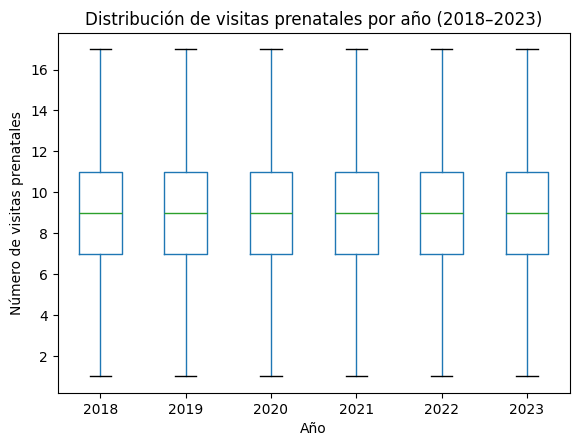

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
final_df.boxplot(column="M14", by="year", grid=False, showfliers=False)
plt.title("Distribución de visitas prenatales por año (2018–2023)")
plt.suptitle("")  # quita el título extra
plt.xlabel("Año")
plt.ylabel("Número de visitas prenatales")
plt.show()


**Interpretación:** Mediana estable: La mayoría de las mujeres embarazadas
 realizan un número de visitas que se encuentra entre 7 y 10,
 con una mediana constante de 9 visitas a lo largo de los años
 2018-2023.

4.4. Análisis por Residencia (Urbano vs. Rural)

A continuación, visualizamos si el tipo de residencia (urbana o rural) se relaciona con el acceso a controles prenatales adecuados a lo largo de los años.
"""

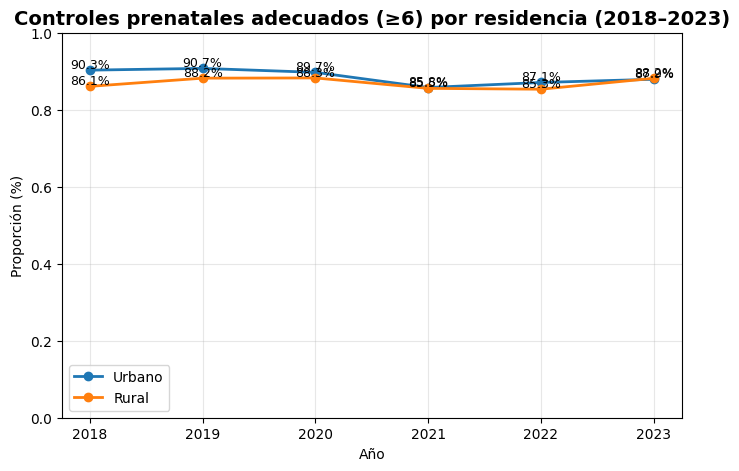

In [ ]:
import matplotlib.pyplot as plt

# 1. Crear variable dependiente: control prenatal adecuado (>=6 visitas)
final_df["prenatal_adecuado"] = (final_df["M14"] >= 6).astype(int)

# 2. Crear variable urbana/rural (1=urbano, 0=rural)
final_df["urbano"] = final_df["V102"].apply(lambda x: 1 if x == 1 else 0)

# 3. Agrupar por año y urbano/rural
tabla_urb = (
    final_df.groupby(["year", "urbano"])["prenatal_adecuado"]
    .mean()
    .reset_index()
)

# 4. Reemplazar urbano/rural con etiquetas
tabla_urb["urbano"] = tabla_urb["urbano"].map({1: "Urbano", 0: "Rural"})

# 5. Graficar
plt.figure(figsize=(8,5))
for area in ["Urbano", "Rural"]:
    data = tabla_urb[tabla_urb["urbano"] == area]
    plt.plot(data["year"], data["prenatal_adecuado"], marker="o", linewidth=2, label=area)

    # Etiquetas encima de cada punto
    for x, y in zip(data["year"], data["prenatal_adecuado"]):
        plt.text(x, y+0.005, f"{y*100:.1f}%", ha="center", fontsize=9)

plt.title("Controles prenatales adecuados (≥6) por residencia (2018–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Proporción (%)")
plt.ylim(0, 1)  # de 0% a 100%
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
##IGNORAR POR EL MOMENTO###

import pyreadstat
import pandas as pd

# Paths
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec94_path = "/content/drive/MyDrive/DATA_ENDES_REC94/REC94_2018.SAV"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# Leer
rec91, _ = pyreadstat.read_sav(rec91_path)
rec41, _ = pyreadstat.read_sav(rec41_path)
rec94, _ = pyreadstat.read_sav(rec94_path)
rec0111, _ = pyreadstat.read_sav(rec0111_path)

# Merge básico por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec94, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Agregar año
df_2018["year"] = 2018

# Subset de variables relevantes
vars_needed = ["CASEID", "year", "M14", "S108N", "SREGION", "V190", "V012", "V102"]
df_2018 = df_2018[[v for v in vars_needed if v in df_2018.columns]]

# Dummy urbano/rural
if "V102" in df_2018.columns:
    df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)

print(df_2018.head())
df_2018.shape
df_2018.describe()

               CASEID  year  M14  S108N  SREGION  V190  V012  V102  urbano
0        000100701  2  2018  8.0    1.0      3.0   3.0  42.0   1.0       1
1        000100701  3  2018  NaN    2.0      3.0   3.0  16.0   1.0       1
2        000101401  2  2018  3.0    4.0      3.0   2.0  20.0   1.0       1
3        000103501  4  2018  NaN    2.0      3.0   2.0  16.0   1.0       1
4        000103501  5  2018  NaN    1.0      3.0   2.0  12.0   1.0       1


,year,M14,S108N,SREGION,V190,V012,V102,urbano
count,48954.0,23089.000000,48954.000000,48954.000000,48954.000000,48954.000000,48954.000000,48954.000000
mean,2018.0,9.291178,2.174511,2.687952,2.518405,28.895371,1.313315,0.686685
std,0.0,6.260429,1.016946,0.976541,1.341843,9.515508,0.463846,0.463846
min,2018.0,0.000000,0.000000,1.000000,1.000000,12.000000,1.000000,0.000000
25%,2018.0,7.000000,2.000000,2.000000,1.000000,22.000000,1.000000,0.000000
50%,2018.0,9.000000,2.000000,3.000000,2.000000,29.000000,1.000000,1.000000
75%,2018.0,11.000000,3.000000,3.000000,4.000000,36.000000,2.000000,1.000000
max,2018.0,98.000000,5.000000,4.000000,5.000000,49.000000,2.000000,1.000000


**Filtrar población objetivo:**

La data ENDES (REC91) incluye mujeres de 15–49 años, pero filtraremos a las que tuvieron un nacimiento en los últimos 5 años.
La variable que nos ayudará es V208 (número de hijos nacidos en los últimos 5 años).

# 5. Conclusiones y Próximos Pasos

El análisis exploratorio nos ha permitido responder de manera contundente a nuestra pregunta de investigación: **Existe una clara y sólida relación positiva entre el nivel educativo de la madre y el acceso a controles prenatales adecuados en el Perú**. Las madres con mayor educación tienen una mayor proporción de controles adecuados.

Además, hemos confirmado que esta relación se ve reforzada por otros factores como el **quintil de riqueza** y la **región geográfica**. También observamos que el acceso mejora significativamente en zonas urbanas en comparación con las rurales.

**Próximos Pasos:**

Este análisis descriptivo es el punto de partida ideal. En la siguiente fase, podríamos aplicar modelos de regresión (por ejemplo, una regresión logística) para cuantificar el impacto marginal de cada variable, controlando por la edad de la madre y otros factores. Esto nos permitiría estimar la magnitud del efecto de la educación, aislando su influencia de la de otras variables y profundizando nuestra comprensión del problema.
